<a href="https://colab.research.google.com/github/ojobo-tech/gisfordatascience/blob/main/ps1_ai_adoption_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIS Project on AI Adoption in Governance Across the World**

**Presented by OJOBO AGBO EJE and SHAILESH REDDY DONTHI**

With the speedy advancement of Artificial Intelligence, and its proven ability to improve productivity and provide accelerated solutions across different sectors of the economy. Research shows that many countries are still behind in the adoption of AI. This could be as a result of many varying factors.

It is also known that the acceptance or adoption of new technology could be affected or influenced by policy made by government for or against the technology.

The goal of this project is to ascertain how ready a given government is to implement AI in the delivery of public service to their citizens.

Answering this question means measuring the multiple dimension of governmental and technological progress that contribute to AI readiness.

NB: This is an annual project carried out by the United Nations and Oxford Insights. A link to the full report: https://www.oxfordinsights.com/s/Government_AI_Readiness_2022_FV.pdf

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.4 MB/s eta 0:00:00


**Data Collection**

The main World Administrative Boundaries shapefile was collected from OpenDataSoft.com

The AI Readiness Index data was collected from OxfordInsights.com

The AI Indicators data was also collected from the UNIDO site

In [4]:
#Data showing the country boundaries was collected from Open Data Soft:

! wget -q -O world-administrative-boundaries.zip https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FNew_York
zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #To Unzip
wd_map = gpd.read_file('world-administrative-boundaries.shp') #To load the shapefile with gpd as wd_map

<Axes: >

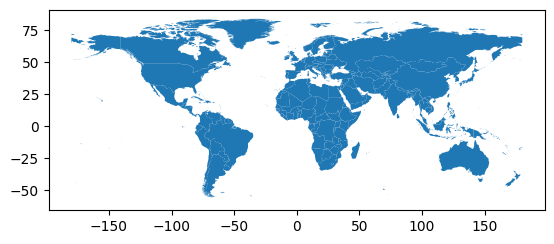

In [5]:
#General Map of the World
wd_map.plot()

**Data Exploration**

We want to explore the type of data for each of the variables from the world map.

In [6]:
wd_map.dtypes #with geopandas can do stuff like with pandas :)

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [7]:
wd_map.head(2)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
1,NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands,"MULTIPOLYGON (((146.68274 43.70777, 146.66664 ..."


In [8]:
#keep it simple!
wd_map=wd_map[['name','geometry']]

In [9]:
#Rename column, so it matches the data that will be merged
wd_map.rename(columns={'name': 'Country'}, inplace=True)

<ipython-input-9-3b5617d10832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_map.rename(columns={'name': 'Country'}, inplace=True)


<Axes: >

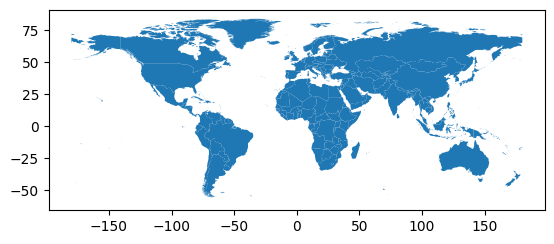

In [10]:
wd_map.plot() #World Map Based on Boundaries

In [11]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']

wd_map = wd_map[wd_map['Country'].isin(countries_to_keep)]


# **Join/Merging**

**Data to be Merged**

To ascertain the readiness of governments, we will measure certain key indicators that influence AI adoption. To execute this, we got two datasets that we will match with the World Map.

Data_1 - AI Readiness Indicators: https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download

Data_2 - Global AI Readiness Index: https://docs.google.com/uc?id=1cHhaREYsLU5AOtfV6tXYz0hBJ695ZZ2p&export=download

**Data_2 Exploration and Processing**

In [26]:
#Import Data_2 - Global AI Readiness Index

url = 'https://docs.google.com/uc?id=1cHhaREYsLU5AOtfV6tXYz0hBJ695ZZ2p&export=download'
global_ai_readinessindex = pd.read_csv(url, encoding='latin-1')

In [27]:
#Exploring the Data Types of the variables
global_ai_readinessindex.dtypes

Country                     object
AI_Index                   float64
Unnamed: 2                 float64
Government                 float64
Technology Sector          float64
Data and Infrastructure    float64
Unnamed: 6                 float64
Vision                       int64
Governance and Ethics      float64
Digital Capacity           float64
Adaptability               float64
Maturity                   float64
Innovation Capacity        float64
Human Capital              float64
Infrastructure             float64
Data Availability          float64
Data Representativeness    float64
dtype: object

In [28]:
#Let us remove the unnecesary variables, leaving only the necessary variables
global_ai_readinessindex=global_ai_readinessindex[['Country','Data Representativeness','AI_Index']]

In [29]:
#Remove Empty Data
global_ai_readinessindex=global_ai_readinessindex.iloc[1:, :]
global_ai_readinessindex

,Country,Data Representativeness,AI_Index
1,Singapore,99.15,84.12
2,United Kingdom,96.68,78.54
3,Finland,88.96,77.59
4,Canada,90.06,77.39
5,Republic of Korea,83.59,76.76
...,...,...,...
176,South Sudan,55.73,19.45
177,Haiti,55.55,18.61
178,Yemen,4.71,17.32
179,Syrian Arab Republic,4.71,16.04


In [30]:
#Exploring the first 5 Rows
global_ai_readinessindex.head(5)

,Country,Data Representativeness,AI_Index
1,Singapore,99.15,84.12
2,United Kingdom,96.68,78.54
3,Finland,88.96,77.59
4,Canada,90.06,77.39
5,Republic of Korea,83.59,76.76


In [31]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']

global_ai_readinessindex = global_ai_readinessindex[global_ai_readinessindex['Country'].isin(countries_to_keep)]


**6. AI Readiness Index**

We want to map AI Readiness across countries. That is, how much does their data actually represent the reality of the people in their country.

First need to get the map with countries (wd_map), then the Data_2 on the Global AI Readiness Index and merge with countries data and finaly color code the polygons.




Merge Data Representativeness

In [34]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'AI_Index']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='inner', indicator=False)


                    Country  AI_Index
0                    France     75.78
1                    Serbia     52.96
2                   Uruguay     58.25
3                    Panama     41.49
4                   Algeria     35.33
..                      ...       ...
174  Bosnia and Herzegovina     35.17
175              Cabo Verde     34.27
176                   Libya     28.84
177                Eswatini     25.46
178           Guinea Bissau     22.82

[179 rows x 2 columns]


<Axes: >

[]

[]

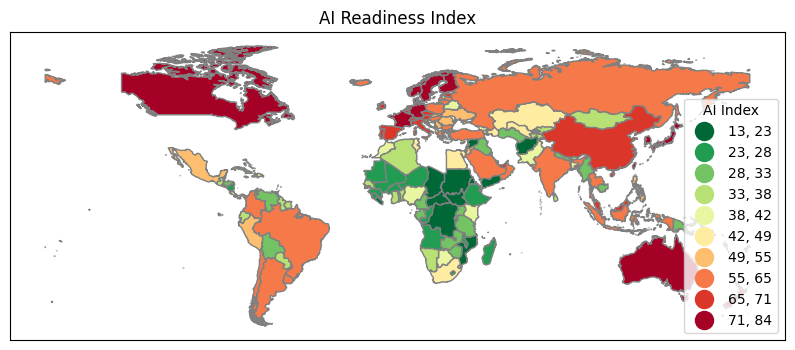

In [35]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='AI_Index',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=10, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''AI Index''')
ax.title.set_text("AI Readiness Index")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**5. Data Representativeness**

We want to map Data Representativeness across countries. That is, how much does their data actually represent the reality of the people in their country.

First need to get the map with countries (wd_map), then the Data_2 on the Global AI Readiness Index and merge with countries data and finaly color code the polygons.




Merge Data Representativeness

In [32]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Data Representativeness']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='inner', indicator=False)


                    Country  Data Representativeness
0                    France                    90.91
1                    Serbia                    75.08
2                   Uruguay                    84.02
3                    Panama                    81.38
4                   Algeria                    62.20
..                      ...                      ...
174  Bosnia and Herzegovina                    73.32
175              Cabo Verde                    63.92
176                   Libya                    71.97
177                Eswatini                    64.81
178           Guinea Bissau                    53.05

[179 rows x 2 columns]


<Axes: >

[]

[]

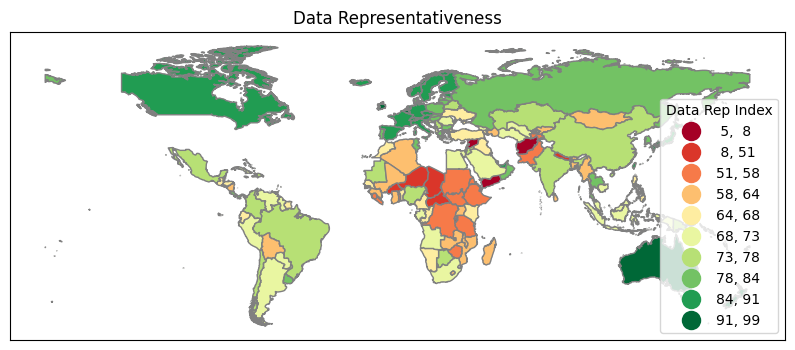

In [33]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='Data Representativeness',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=10, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Data Rep Index''')
ax.title.set_text("Data Representativeness")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Data_1 Exploration and Processing**

In [12]:
#Import the Data_1: AI Readiness Indicators

url = 'https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download'
ai_readiness_indicators = pd.read_csv(url, encoding='latin-1')

In [13]:
#Exploring the Data Types of the variables
ai_readiness_indicators.dtypes

Country                                                                    object
AI strategy                                                                 int64
Data protection and privacy laws                                            int64
Cybersecurity                                                             float64
Legal framework's adaptability to digital business models                 float64
Ethical principles                                                          int64
Accountability                                                            float64
Online services                                                           float64
Foundational IT infrastructure                                            float64
Government Promotion of Investment in Emerging Technologies               float64
Government Effectiveness                                                  float64
Government responsiveness to change                                       float64
Procurement Data

In [14]:
#Let us remove the unnecesary variables, leaving only the necessary variables
ai_readiness_indicators = ai_readiness_indicators[['Country','Graduates in STEM or computer science','Foundational IT infrastructure','Adoption of Emerging Technologies','AI research papers (log transformation)','Government responsiveness to change']]

In [15]:
#Exploring the first 5 Rows
ai_readiness_indicators.head(5)

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change
0,Afghanistan,11.25,41.46,NaN,19.68,NaN
1,Albania,18.54,70.68,19.18,18.12,42.81
2,Algeria,30.13,49.33,47.15,54.07,48.18
3,Andorra,7.45,19.58,72.16,0.00,48.79
4,Angola,12.01,43.58,16.41,0.00,31.42


In [16]:
#Remove Empty Data
ai_readiness_indicators=ai_readiness_indicators.iloc[1:, :]
ai_readiness_indicators

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change
1,Albania,18.54,70.68,19.18,18.12,42.81
2,Algeria,30.13,49.33,47.15,54.07,48.18
3,Andorra,7.45,19.58,72.16,0.00,48.79
4,Angola,12.01,43.58,16.41,0.00,31.42
5,Antigua and Barbuda,4.72,46.58,46.96,0.00,38.81
...,...,...,...,...,...,...
176,Venezuela,17.19,37.74,46.09,26.69,7.20
177,Viet Nam,22.68,80.40,50.09,61.18,49.40
178,Yemen,22.96,34.98,NaN,32.95,21.89
179,Zambia,18.64,65.31,25.44,11.11,39.47


In [17]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']

ai_readiness_indicators = ai_readiness_indicators[ai_readiness_indicators['Country'].isin(countries_to_keep)]


**1. Government Responsivesness to Change**

We want to map Governments Responsivesness to Change across countries

First need to get the map with countries (wd_map), then the Data_1 on AI Readiness Indicators and merge with countries data and finaly color code the polygons.




Merge Government's Responsiveness to Change

In [18]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Government responsiveness to change']]
print(result)

# Merge using inner join to keep exact matches
wd_map2 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  Government responsiveness to change
0                 France                                55.99
1                 Serbia                                44.30
2                Uruguay                                32.09
3                 Panama                                39.33
4                Algeria                                48.18
..                   ...                                  ...
174                Libya                                42.70
175      North Macedonia                                31.84
176  Republic of Moldova                                35.21
177       United Kingdom                                58.37
178             Viet Nam                                49.40

[179 rows x 2 columns]


<Axes: >

[]

[]

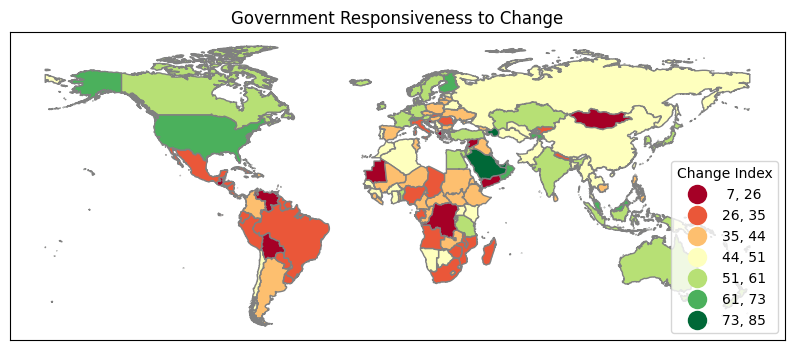

In [19]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map2.plot(ax=ax,column='Government responsiveness to change',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Change Index''')
ax.title.set_text("Government Responsiveness to Change")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**2. Foundational IT infrastructure**

We want to map Foundational IT infrastructure across countries

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge Foundational IT infrastructure

In [20]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Foundational IT infrastructure']]
print(result)

# Merge using inner join to keep exact matches
wd_map3 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  Foundational IT infrastructure
0                 France                           92.28
1                 Serbia                           80.22
2                Uruguay                           87.76
3                 Panama                           79.39
4                Algeria                           49.33
..                   ...                             ...
174                Libya                           15.61
175      North Macedonia                           58.31
176  Republic of Moldova                           74.24
177       United Kingdom                           67.50
178             Viet Nam                           80.40

[179 rows x 2 columns]


<Axes: >

[]

[]

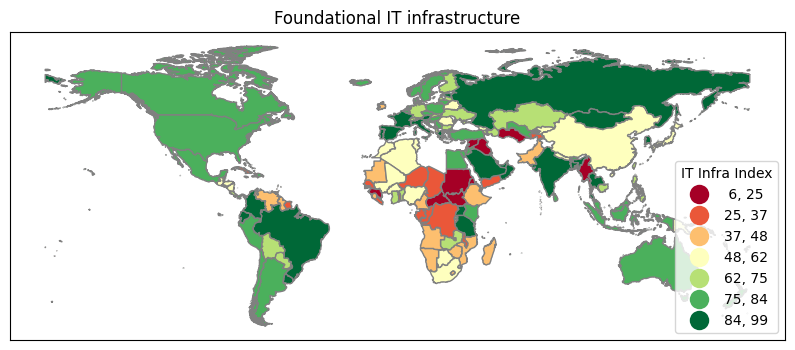

In [21]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map2.plot(ax=ax,column='Foundational IT infrastructure',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''IT Infra Index''')
ax.title.set_text("Foundational IT infrastructure")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**3. AI research papers**

We want to map Foundational IT infrastructure across countries

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [22]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'AI research papers (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_map3 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  AI research papers (log transformation)
0                 France                                    72.38
1                 Serbia                                    45.28
2                Uruguay                                    14.02
3                 Panama                                     7.01
4                Algeria                                    54.07
..                   ...                                      ...
174                Libya                                    42.52
175      North Macedonia                                    23.28
176  Republic of Moldova                                    16.27
177       United Kingdom                                    80.09
178             Viet Nam                                    61.18

[179 rows x 2 columns]


<Axes: >

[]

[]

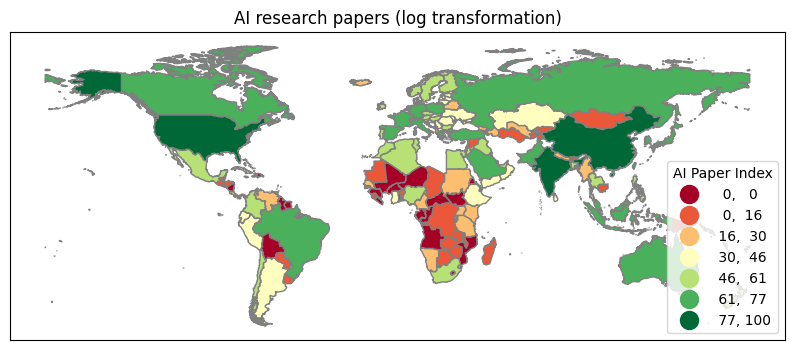

In [23]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map2.plot(ax=ax,column='AI research papers (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''AI Paper Index''')
ax.title.set_text("AI research papers (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**4. Graduates in STEM or computer science**

We want to map Graduates in STEM or computer science across countries

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge Graduates in STEM or computer science

In [24]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Graduates in STEM or computer science']]
print(result)

# Merge using inner join to keep exact matches
wd_map4 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  Graduates in STEM or computer science
0                 France                                  25.89
1                 Serbia                                  30.10
2                Uruguay                                  15.24
3                 Panama                                  13.74
4                Algeria                                  30.13
..                   ...                                    ...
174                Libya                                  28.42
175      North Macedonia                                  20.61
176  Republic of Moldova                                  25.01
177       United Kingdom                                  22.75
178             Viet Nam                                  22.68

[179 rows x 2 columns]


<Axes: >

[]

[]

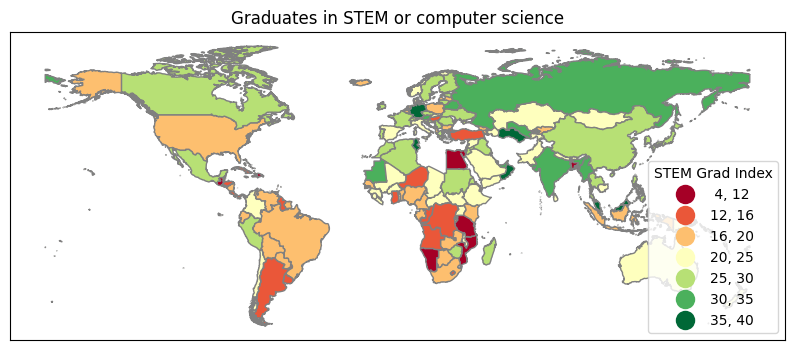

In [25]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map2.plot(ax=ax,column='Graduates in STEM or computer science',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''STEM Grad Index''')
ax.title.set_text("Graduates in STEM or computer science")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

# \>\>\> will be updated from here >>>

# bells and whistles (geopandas)
TODO expand massively on geopandas all bells and whistles
TODO do a bit of pandas for dat man like reading in data and looking at it!!

matplotlib options like side by side (just expand sep12 dive into thematic; like to pop and pop dens; and then like over time 1990 v 2010 etc)

putting txt box onto it

and other advanced stuff from my vis class as per matplotlib


### for nat sci people

https://www.pyngl.ucar.edu/Examples/gallery.shtml

https://cdat.llnl.gov/gallery.html

## notes to myself

the whole course, geo dat sci:
https://darribas.org/gds_course/content/home.html

LATER:
 basemap! guess the first one! used to use it, but dead, depreciated in favor of cartopy
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html